<a href="https://colab.research.google.com/github/eduzeu/newspaperAnalysis/blob/main/CS513_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install liac-arff

In [ ]:
import arff
import numpy as np
import pandas as pd
import re
from io import StringIO

In [ ]:
# Load the ARFF file
with open('/content/dataset') as f:
    dataset = arff.load(f)

# Extract attributes and data
attribute_names = [attr[0] for attr in dataset['attributes']]
data = dataset['data']

# Create DataFrame
df = pd.DataFrame(data, columns=attribute_names)

In [ ]:
# Preview
print(len(df))
print(df.shape)

15855
(15855, 19)


In [ ]:
print(df.columns)

Index(['SubscriptionID', 'HH Income', 'Home Ownership', 'Ethnicity',
       'dummy for Children', 'Year Of Residence', 'Age range', 'Language',
       'Address', 'State', 'City', 'County', 'Zip Code', 'weekly fee',
       'Deliveryperiod', 'Nielsen Prizm', 'reward program', 'Source Channel',
       'Subscriber'],
      dtype='object')


In [ ]:
print(df["County"].unique())

['LOS ANGELES' 'ORANGE' 'RIVERSIDE' 'SAN BERNARDINO']


In [ ]:
print(df["Home Ownership"].unique())

['RENTER' 'OWNER']


In [ ]:
print(df["dummy for Children"].unique())

['N' 'Y']


In [ ]:
print(df["Year Of Residence"].unique())

[ 1 14  7 23 10  4 22  2  6 25 16 11 12 26 20  3 21 15 17 27 30 13 19  9
 28  5 24 37 29  8 50 38 18 32 31 41 48 55 40 34 33 43 46 52 42 35 39 54
 44 53 45 36 47 49 51 56]


In [ ]:
print(df["Age range"].unique())

['25-29' '50-54' '45-49' '55-59' '60-64' '75 years or more' '65-69'
 '70-74' '40-44' '24 years or less' '35-39' '30-34' None]


In [ ]:
print(df["City"].unique())

['LONG BEACH' 'NEWPORT COAST' 'IRVINE' 'LAGUNA NIGUEL'
 'RANCHO SANTA MARGARITA' 'LADERA RANCH' 'SAN CLEMENTE' 'BUENA PARK'
 'ALISO VIEJO' 'LAGUNA WOODS' 'NEWPORT BEACH' 'FOOTHILL RANCH'
 'TRABUCO CANYON' 'DANA POINT' 'LAGUNA HILLS' 'LAGUNA BEACH' 'ANAHEIM'
 'SANTA ANA' 'FULLERTON' 'LA HABRA' 'COSTA MESA' 'PLACENTIA'
 'HUNTINGTON BEACH' 'CYPRESS' 'GARDEN GROVE' 'CORONA' 'BREA' 'WESTMINSTER'
 'WHITTIER' 'FOUNTAIN VALLEY' 'VILLA PARK' 'ORANGE' 'TUSTIN' 'STANTON'
 'NORCO' 'DIAMOND BAR' 'LOS ALAMITOS' 'MISSION VIEJO' 'CERRITOS'
 'CORONA DEL MAR' 'SEAL BEACH' 'LAKEWOOD' 'ARTESIA' 'CHINO' 'LA MIRADA'
 'HAWAIIAN GARDENS' 'CHINO HILLS' 'MIDWAY CITY' 'YORBA LINDA'
 'SIGNAL HILL' 'LAKE FOREST' 'SILVERADO' 'SAN JUAN CAPISTRANO'
 'CAPISTRANO BEACH' 'MURRIETA' 'LA PALMA']


In [ ]:
print(df["Language"].unique())

['German' None 'English' 'Italian' 'Chinese' 'Spanish' 'Vietnamese'
 'Farsi (Persian)' 'Japanese' 'Turkish' 'Polish' 'Russian' 'Portuguese'
 'Hebrew' 'Hindi' 'Arabic' 'Korean' 'Urdu' 'Czech' 'Romanian' 'Thai'
 'Khmer (Cambodian)' 'Danish' 'Amharic' 'Laotian (Lao)' 'Swedish'
 'Tagalog' 'French' 'Armenian' 'Norwegian' 'Hungarian' 'Finnish' 'Ga'
 'Slovenian' 'Dutch' 'Serbo-Croatian' 'Greek' 'Latvian (Lettish)']


In [ ]:
print(df["Ethnicity"].unique())

['German' 'unknown' 'Italian' 'English' 'Scottish (Scotch)' 'Hispanic'
 'Chinese' 'Irish' 'Swedish' 'Filipino (Philippine)' 'Jewish' 'Arab'
 'Japanese' 'Indian' 'Vietnamese' 'Persian' 'French' 'Korean' 'Turkish'
 'Norwegian' 'Armenian' 'Austrian' 'Polish' 'Portuguese' 'Dutch' 'Welsh'
 'Belgian' 'Byelorussian (Belarusian)' 'Czech' 'Thai' 'Ukrainian'
 'African (other)' 'Danish' 'Native American (American Indian)'
 'Zimbabwean' 'Hungarian' 'Russian' 'Pakistani' 'Greek'
 'Khmer (Kampuchean, Cambodian)' 'Lithuanian' 'Romanian'
 'African American 95%+' 'Egyptian' 'Finnish' 'Ethiopian' 'multi-ethnic'
 'Slovakian (Slovak)' 'Serbian' 'Swiss' 'Laotian' 'Ugandan' 'Croatian'
 'Ruandan (Rwandan)' 'Malawian' 'Indonesian' 'Angolan' 'Latvian' 'Iraqi'
 'Hawaiian' 'Syrian' 'Luxembourgian' 'Albanian' 'Ghanaian'
 'Slovenian (Slovene)' 'Kenyan' 'Myanmar (Burma)' 'Bulgarian' 'Bhutanese'
 'Swaziland' 'Nigerian' 'Estonian'
 'Zairian (Democratic Republic of the Con']


In [ ]:
print(df["Deliveryperiod"].unique())

['7Day' 'SunOnly' 'Thu-Sun' 'SatSun' '7DayOL' 'SoooooS' 'oMTWTFo'
 'THU-SUN' 'Mon-Fri' '7DAY' 'SooooFS' 'SooooooT' '7DayT' 'Fri-Sun'
 'SoooTFS' 'SunOnlyT' 'Soooooo' 'Thu-SunT' 'Fri-SunT' 'SoooTFST' 'Sun-Fri'
 'sunonly' 'SoooooST' '7day' 'Sun-FriT' 'SUNONLY' 'thu-sun' 'SooooFST']


In [ ]:
print(df["Nielsen Prizm"].unique())

['FM' 'MW' 'MM' 'FW' 'YW' 'YM' None 'ME' 'YE' 'FE']


In [ ]:
print(df["reward program"].unique())

[  0   1   2  14   6  54   4   3   8   5  26  62  13   7 181  24  25   9
  28  37 122  11  50  79  16  59 185 353  42  74  52  12  70  61  18  78
 144  35  91  17  38  23 114  22  15  21  73  19  77  41  71  32  72 216
  36  67 110  31  33  80  27 141 115  10 100  30  63  44  29 104  40 244
  58  45  39  51  20  64 170  56 255  53  87  98  34 108 212  46  76  66
  69 112 119  65 125  97 103 182 135  95  47  92  43  85 136 189 150  81
  94 124  60 155 210 140 164  48]


In [ ]:
print(df["Source Channel"].unique())

['CircAdm' 'Partner' 'Internet' 'Crew' 'Kiosk' 'SCinsert' 'TeleIn'
 'CustCall' 'RetenIn' 'DirectMl' 'TeleOut' 'VRU' 'Kiosk1' 'System' 'Chat'
 'AdvAdm' 'TMC' 'Crew1' 'Email' 'RetenOut' 'InPaper' 'Kiosk4' 'Assoc'
 'Event' 'Kiosk2' 'OutMedia' 'Internt4' 'PARTNER' 'Crew4' 'Kiosk5'
 'Counter' 'Event1' 'FUSS' 'Crew3' 'Crew2' 'INTERNET' 'CSR' 'DIRECTM2'
 'EMAIL4' 'iSrvices' 'DIRECTM4' 'Kiosk3' 'RetMail' 'Gift' 'SCINSRT4'
 'Agent' 'SCINSRT6' 'ExecAdm' 'Contest' 'CCAuto' 'DTI']


In [ ]:
print(df["Subscriber"].unique())

['NO' 'YES']


In [ ]:
num_null_rows = df.isna().any(axis=1).sum()
print(num_null_rows)

1394


In [ ]:
print(df[df.isna().any(axis=1)])

       SubscriptionID            HH Income Home Ownership Ethnicity  \
1           181401653        $500,000 Plus          OWNER   unknown   
15          150186113  $200,000 - $249,999          OWNER   unknown   
30          181255097        $500,000 Plus          OWNER   English   
35          140541579        Under $20,000         RENTER   English   
73          130050024  $100,000 - $124,999          OWNER   unknown   
...               ...                  ...            ...       ...   
15698       180302287        Under $20,000         RENTER   unknown   
15725       180760077  $300,000 - $399,999          OWNER   unknown   
15726       180701567        Under $20,000         RENTER   unknown   
15794       120253583  $300,000 - $399,999          OWNER   unknown   
15853       180551649  $  80,000 - $89,999          OWNER  Hispanic   

      dummy for Children  Year Of Residence         Age range Language  \
1                      Y                 14             50-54     None   

In [ ]:
# Dropping Null Values since there are only 1,394 out of total 15, 855.
df = df.dropna()

In [ ]:
# Drop Unnecessary columns
df = df.drop(columns = ['SubscriptionID', 'Address', 'State'])

In [ ]:
# Implementing K Nearest Neighbors Algorithm
attr = df.drop(columns = ['Subscriber'])  # features
target = df['Subscriber']  # target variable
attr.head()

HH Income Home Ownership          Ethnicity dummy for Children  \
0  $  30,000 - $39,999         RENTER             German                  N   
2  $100,000 - $124,999          OWNER            Italian                  Y   
3  $200,000 - $249,999          OWNER            English                  N   
4  $  50,000 - $59,999          OWNER            Italian                  N   
5        $500,000 Plus          OWNER  Scottish (Scotch)                  Y   

   Year Of Residence Age range Language                    City       County  \
0                  1     25-29   German              LONG BEACH  LOS ANGELES   
2                  7     45-49  English                  IRVINE       ORANGE   
3                 23     55-59  English           LAGUNA NIGUEL       ORANGE   
4                 23     60-64  English  RANCHO SANTA MARGARITA       ORANGE   
5                 10     45-49  English            LADERA RANCH       ORANGE   

   Zip Code     weekly fee Deliveryperiod Nielsen Prizm  reward program  \
0     90802  $7.00 - $7.99           7Day            FM               0   
2     92604  $0.01 - $0.50        SunOnly            MW               0   
3     92677  $1.00 - $1.99        SunOnly            MW               1   
4     92688  $8.00 - $8.99        Thu-Sun            MM               0   
5     92694     $0 - $0.01        SunOnly            FW               0   

  Source Channel  
0        CircAdm  
2        Partner  
3       Internet  
4           Crew  
5        Partner

In [ ]:
print(attr.columns.tolist())

['HH Income', 'Home Ownership', 'Ethnicity', 'dummy for Children', 'Year Of Residence', 'Age range', 'Language', 'City', 'County', 'Zip Code', 'weekly fee', 'Deliveryperiod', 'Nielsen Prizm', 'reward program', 'Source Channel']


In [ ]:
print(attr['HH Income'].unique())

['$  30,000 - $39,999' '$100,000 - $124,999' '$200,000 - $249,999'
 '$  50,000 - $59,999' '$500,000 Plus' '$150,000 - $174,999'
 '$400,000 - $499,999' '$175,000 - $199,999' '$125,000 - $149,999'
 'Under $20,000' '$  80,000 - $89,999' '$  90,000 - $99,999'
 '$300,000 - $399,999' '$  20,000 - $29,999' '$  70,000 - $79,999'
 '$  60,000 - $69,999' '$  40,000 - $49,999' '$250,000 - $299,999']


In [ ]:
print(df["weekly fee"].unique())

['$7.00 - $7.99' '$0.01 - $0.50' '$1.00 - $1.99' '$8.00 - $8.99'
 '$0 - $0.01' '$2.00 - $2.99' '$9.00 - $9.99' '$4.00 - $4.99'
 '$0.51 - $0.99' '$3.00 - $3.99' '$5.00 - $5.99' '$6.00 - $6.99'
 '$10.00 - $10.99' '$0']


In [ ]:
def clean_income(val):
    if isinstance(val, str):
        return val.strip().replace('–', '-')
    return val

def clean_fee(val):
    if isinstance(val, str):
        return val.strip().replace('–', '-')
    return val

attr['HH Income'] = attr['HH Income'].apply(clean_income)
attr['weekly fee'] = attr['weekly fee'].apply(clean_fee)

In [ ]:
# Then, use ordinal one-hot encoding for binned columns like HH income and weekly fee.
income_order = {
    'Under $20,000': 0,
    '$  20,000 - $29,999': 1,
    '$  30,000 - $39,999': 2,
    '$  40,000 - $49,999': 3,
    '$  50,000 - $59,999': 4,
    '$  60,000 - $69,999': 5,
    '$  70,000 - $79,999': 6,
    '$  80,000 - $89,999': 7,
    '$  90,000 - $99,999': 8,
    '$100,000 - $124,999': 9,
    '$125,000 - $149,999': 10,
    '$150,000 - $174,999': 11,
    '$175,000 - $199,999': 12,
    '$200,000 - $249,999': 13,
    '$250,000 - $299,999': 14,
    '$300,000 - $399,999': 15,
    '$400,000 - $499,999': 16,
    '$500,000 Plus' : 17
}
weekly_fee_order = {
    'None' : 0,
    '$0' : 1,
    '$0 - $0.01': 2,
    '$0.01 - $0.50': 3,
    '$0.51 - $0.99': 4,
    '$1.00 - $1.99': 5,
    '$2.00 - $2.99': 6,
    '$3.00 - $3.99': 7,
    '$4.00 - $4.99': 8,
    '$5.00 - $5.99': 9,
    '$6.00 - $6.99': 10,
   '$7.00 - $7.99': 11,
    '$8.00 - $8.99': 12,
    '$9.00 - $9.99': 13,
    '$10.00 - $10.99' : 14
}
income_mapping = {label: idx for idx, label in enumerate(income_order)}
weekly_fee_mapping = {label: idx for idx, label in enumerate(weekly_fee_order)}
attr['weekly fee'] = attr['weekly fee'].map(weekly_fee_mapping)
attr['HH Income'] = attr['HH Income'].map(income_mapping)
print(attr['HH Income'].unique())
print(attr['weekly fee'].unique())

[ 2  9 13  4 17 11 16 12 10  0  7  8 15  1  6  5  3 14]
[11  3  5 12  2  6 13  8  4  7  9 10 14  1]


In [ ]:
attr = pd.get_dummies(attr, drop_first=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the data
attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)
attr.head()

HH Income  Year Of Residence  Zip Code  weekly fee  reward program  \
0   0.117647           0.000000  0.087128    0.769231        0.000000   
1   0.529412           0.109091  0.876095    0.153846        0.000000   
2   0.764706           0.400000  0.908056    0.307692        0.002833   
3   0.235294           0.400000  0.912872    0.846154        0.000000   
4   1.000000           0.163636  0.915499    0.076923        0.000000   

   Home Ownership_RENTER  Ethnicity_African American 95%+  Ethnicity_Albanian  \
0                    1.0                              0.0                 0.0   
1                    0.0                              0.0                 0.0   
2                    0.0                              0.0                 0.0   
3                    0.0                              0.0                 0.0   
4                    0.0                              0.0                 0.0   

   Ethnicity_Angolan  Ethnicity_Arab  ...  Source Channel_RetenOut  \
0                0.0             0.0  ...                      0.0   
1                0.0             0.0  ...                      0.0   
2                0.0             0.0  ...                      0.0   
3                0.0             0.0  ...                      0.0   
4                0.0             0.0  ...                      0.0   

   Source Channel_SCINSRT4  Source Channel_SCINSRT6  Source Channel_SCinsert  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   Source Channel_System  Source Channel_TMC  Source Channel_TeleIn  \
0                    0.0                 0.0                    0.0   
1                    0.0                 0.0                    0.0   
2                    0.0                 0.0                    0.0   
3                    0.0                 0.0                    0.0   
4                    0.0                 0.0                    0.0   

   Source Channel_TeleOut  Source Channel_VRU  Source Channel_iSrvices  
0                     0.0                 0.0                      0.0  
1                     0.0                 0.0                      0.0  
2                     0.0                 0.0                      0.0  
3                     0.0                 0.0                      0.0  
4                     0.0                 0.0                      0.0  

[5 rows x 267 columns]

In [ ]:
import random
random_state=55
random.seed(random_state )  # Set the seed
# random.seed()
print(random.randint(1, 100))  # Generates a random number

12


In [ ]:
attr_train, attr_test, target_train,target_test  = train_test_split(attr, target,test_size = 0.30, random_state =random_state , shuffle = True)
target_train.head()
# attr_train.head()
target_test.head()

1317     NO
7900     NO
7869     NO
3249     NO
13834    NO
Name: Subscriber, dtype: object

In [ ]:
from sklearn.metrics import accuracy_score
k_values = range(1,31)

# for i in range(1,20):
#     print(i)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
#     knn = KNeighborsClassifier(n_neighbors = k,weights='distance')
    knn.fit(attr_train, target_train)
    target_pred = knn.predict(attr_test)
#     accuracy = round(np.mean(target_test==target_pred ) * 100, 2)
    accuracy = accuracy_score(target_test,target_pred )
    print(f'Accuracy of model with k = {k}: {accuracy}')
    print('')

Accuracy of model with k = 1: 0.7434892832449873

Accuracy of model with k = 2: 0.8024890527771376

Accuracy of model with k = 3: 0.7808250749020512

Accuracy of model with k = 4: 0.806407006222632

Accuracy of model with k = 5: 0.8022585849274027

Accuracy of model with k = 6: 0.8096335561189214

Accuracy of model with k = 7: 0.805946070523162

Accuracy of model with k = 8: 0.811938234616271

Accuracy of model with k = 9: 0.8089421525697166

Accuracy of model with k = 10: 0.8144733809633556

Accuracy of model with k = 11: 0.8142429131136206

Accuracy of model with k = 12: 0.8153952523622955

Accuracy of model with k = 13: 0.8160866559115003

Accuracy of model with k = 14: 0.8135515095644158

Accuracy of model with k = 15: 0.8188522701083198

Accuracy of model with k = 16: 0.8165475916109702

Accuracy of model with k = 17: 0.8183913344088499

Accuracy of model with k = 18: 0.8200046093569947

Accuracy of model with k = 19: 0.8197741415072597

Accuracy of model with k = 20: 0.8188522701

In [ ]:
k_values = range(1,31)

# for i in range(1,20):
#     print(i)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k,weights='distance')
#     knn = KNeighborsClassifier(n_neighbors = k,weights='distance')
    knn.fit(attr_train, target_train)
    target_pred = knn.predict(attr_test)
#     accuracy = round(np.mean(target_test==target_pred ) * 100, 2)
    accuracy = accuracy_score(target_test,target_pred )
    print(f'Accuracy of model with k = {k}: {accuracy}')
    print('')

Accuracy of model with k = 1: 0.7434892832449873

Accuracy of model with k = 2: 0.7434892832449873

Accuracy of model with k = 3: 0.7799032035031113

Accuracy of model with k = 4: 0.7854344318967504

Accuracy of model with k = 5: 0.7994929707305831

Accuracy of model with k = 6: 0.7983406314819083

Accuracy of model with k = 7: 0.8029499884766075

Accuracy of model with k = 8: 0.805715602673427

Accuracy of model with k = 9: 0.805715602673427

Accuracy of model with k = 10: 0.8070984097718368

Accuracy of model with k = 11: 0.812168702466006

Accuracy of model with k = 12: 0.8158561880617654

Accuracy of model with k = 13: 0.8142429131136206

Accuracy of model with k = 14: 0.8153952523622955

Accuracy of model with k = 15: 0.8176999308596451

Accuracy of model with k = 16: 0.8167780594607053

Accuracy of model with k = 17: 0.8167780594607053

Accuracy of model with k = 18: 0.8188522701083198

Accuracy of model with k = 19: 0.8172389951601752

Accuracy of model with k = 20: 0.8176999308

In [ ]:
# So, it appears that training both models plateaus around 0.82 percent accuracy.
# weights = 'distance' in KNN doesn't help much meaning the features are already well scaled enough using MinMaxScaler.
# It appears that this is the best that this model can do.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(target_test, target_pred)

print('Confusion Matrix')
print(confusion_matrix(target_test, target_pred))
print()
print('Accuracy score')
print(accuracy_score(target_test, target_pred))
print()
print('Classification Report')
print(classification_report(target_test, target_pred))

Confusion Matrix
[[3436   65]
 [ 715  123]]

Accuracy score
0.8202350772067296

Classification Report
              precision    recall  f1-score   support

          NO       0.83      0.98      0.90      3501
         YES       0.65      0.15      0.24       838

    accuracy                           0.82      4339
   macro avg       0.74      0.56      0.57      4339
weighted avg       0.79      0.82      0.77      4339



In [ ]:
test_actual=attr_test
test_actual['target_pred']=target_pred
test_actual['test_actual']=target_test
test_actual.head()

HH Income  Year Of Residence  Zip Code  weekly fee  reward program  \
1220    0.411765           0.254545  0.996497    0.461538             0.0   
7271    0.000000           0.218182  0.919877    0.538462             0.0   
7242    1.000000           0.400000  0.908056    0.153846             0.0   
3018    0.470588           0.400000  0.953152    0.769231             0.0   
12580   0.529412           0.127273  0.007443    0.076923             0.0   

       Home Ownership_RENTER  Ethnicity_African American 95%+  \
1220                     0.0                              0.0   
7271                     0.0                              0.0   
7242                     0.0                              0.0   
3018                     0.0                              0.0   
12580                    0.0                              0.0   

       Ethnicity_Albanian  Ethnicity_Angolan  Ethnicity_Arab  ...  \
1220                  0.0                0.0             0.0  ...   
7271                  0.0                0.0             0.0  ...   
7242                  0.0                0.0             0.0  ...   
3018                  0.0                0.0             0.0  ...   
12580                 0.0                0.0             0.0  ...   

       Source Channel_SCINSRT6  Source Channel_SCinsert  \
1220                       0.0                      0.0   
7271                       0.0                      0.0   
7242                       0.0                      0.0   
3018                       0.0                      0.0   
12580                      0.0                      0.0   

       Source Channel_System  Source Channel_TMC  Source Channel_TeleIn  \
1220                     0.0                 0.0                    0.0   
7271                     0.0                 0.0                    0.0   
7242                     0.0                 0.0                    0.0   
3018                     0.0                 0.0                    0.0   
12580                    0.0                 0.0                    0.0   

       Source Channel_TeleOut  Source Channel_VRU  Source Channel_iSrvices  \
1220                      0.0                 0.0                      0.0   
7271                      0.0                 0.0                      0.0   
7242                      0.0                 0.0                      0.0   
3018                      0.0                 0.0                      0.0   
12580                     0.0                 0.0                      0.0   

       target_pred  test_actual  
1220            NO          NaN  
7271            NO          NaN  
7242            NO          NaN  
3018            NO          NaN  
12580           NO          NaN  

[5 rows x 269 columns]

In [ ]:
freq_table =pd.crosstab( test_actual['test_actual'], test_actual['target_pred'])
print("Confusion Matrix")
print(freq_table)

Confusion Matrix
target_pred   NO  YES
test_actual          
NO           904   40
YES          233    8


[Text(0, 0.5, '2'), Text(0, 1.5, '4')]

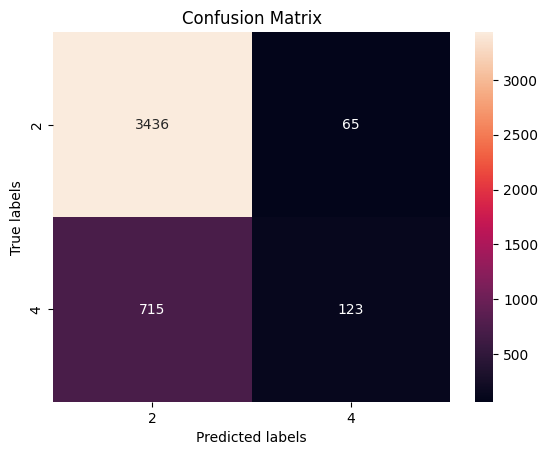

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['2', '4'])
ax.yaxis.set_ticklabels(['2', '4'])

In [ ]:
# Next, implement CART.
attr = df.drop(columns = ['Subscriber'])  # features
target = df['Subscriber']  # target variable
attr.head()

HH Income Home Ownership          Ethnicity dummy for Children  \
0  $  30,000 - $39,999         RENTER             German                  N   
2  $100,000 - $124,999          OWNER            Italian                  Y   
3  $200,000 - $249,999          OWNER            English                  N   
4  $  50,000 - $59,999          OWNER            Italian                  N   
5        $500,000 Plus          OWNER  Scottish (Scotch)                  Y   

   Year Of Residence Age range Language                    City       County  \
0                  1     25-29   German              LONG BEACH  LOS ANGELES   
2                  7     45-49  English                  IRVINE       ORANGE   
3                 23     55-59  English           LAGUNA NIGUEL       ORANGE   
4                 23     60-64  English  RANCHO SANTA MARGARITA       ORANGE   
5                 10     45-49  English            LADERA RANCH       ORANGE   

   Zip Code     weekly fee Deliveryperiod Nielsen Prizm  reward program  \
0     90802  $7.00 - $7.99           7Day            FM               0   
2     92604  $0.01 - $0.50        SunOnly            MW               0   
3     92677  $1.00 - $1.99        SunOnly            MW               1   
4     92688  $8.00 - $8.99        Thu-Sun            MM               0   
5     92694     $0 - $0.01        SunOnly            FW               0   

  Source Channel  
0        CircAdm  
2        Partner  
3       Internet  
4           Crew  
5        Partner

In [ ]:
def clean_income(val):
    if isinstance(val, str):
        return val.strip().replace('–', '-')
    return val

def clean_fee(val):
    if isinstance(val, str):
        return val.strip().replace('–', '-')
    return val

attr['HH Income'] = attr['HH Income'].apply(clean_income)
attr['weekly fee'] = attr['weekly fee'].apply(clean_fee)

In [ ]:
# Then, use ordinal one-hot encoding for binned columns like HH income and weekly fee.
income_order = {
    'Under $20,000': 0,
    '$  20,000 - $29,999': 1,
    '$  30,000 - $39,999': 2,
    '$  40,000 - $49,999': 3,
    '$  50,000 - $59,999': 4,
    '$  60,000 - $69,999': 5,
    '$  70,000 - $79,999': 6,
    '$  80,000 - $89,999': 7,
    '$  90,000 - $99,999': 8,
    '$100,000 - $124,999': 9,
    '$125,000 - $149,999': 10,
    '$150,000 - $174,999': 11,
    '$175,000 - $199,999': 12,
    '$200,000 - $249,999': 13,
    '$250,000 - $299,999': 14,
    '$300,000 - $399,999': 15,
    '$400,000 - $499,999': 16,
    '$500,000 Plus' : 17
}
weekly_fee_order = {
    'None' : 0,
    '$0' : 1,
    '$0 - $0.01': 2,
    '$0.01 - $0.50': 3,
    '$0.51 - $0.99': 4,
    '$1.00 - $1.99': 5,
    '$2.00 - $2.99': 6,
    '$3.00 - $3.99': 7,
    '$4.00 - $4.99': 8,
    '$5.00 - $5.99': 9,
    '$6.00 - $6.99': 10,
   '$7.00 - $7.99': 11,
    '$8.00 - $8.99': 12,
    '$9.00 - $9.99': 13,
    '$10.00 - $10.99' : 14
}
income_mapping = {label: idx for idx, label in enumerate(income_order)}
weekly_fee_mapping = {label: idx for idx, label in enumerate(weekly_fee_order)}
attr['weekly fee'] = attr['weekly fee'].map(weekly_fee_mapping)
attr['HH Income'] = attr['HH Income'].map(income_mapping)
print(attr['HH Income'].unique())
print(attr['weekly fee'].unique())

[ 2  9 13  4 17 11 16 12 10  0  7  8 15  1  6  5  3 14]
[11  3  5 12  2  6 13  8  4  7  9 10 14  1]


In [ ]:
attr = pd.get_dummies(attr, drop_first=True)

In [ ]:
attr_train, attr_test, target_train,target_test  = train_test_split(attr, target,test_size = 0.25, random_state = 44, shuffle = True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
CART = DecisionTreeClassifier()

CART.fit(attr_train, target_train)
target_pred = CART.predict(attr_test)
accuracy = accuracy_score(target_test,target_pred )
print(f'Accuracy of model {accuracy}%')
print('')

Accuracy of model 0.8000553097345132%



In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(50,30), dpi=250)
plot_tree(CART,fontsize=20,filled=True,feature_names=attr.columns);